In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [61]:
#import libraries

import numpy as np
import tensorflow.keras as keras
import json
from sklearn.model_selection import train_test_split
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
# Get GPU info and use a gpu


In [3]:
# CONSTANTS

PATH_TO_DRIVE = "/content/drive/My Drive"
DATASET_PATH = PATH_TO_DRIVE + "/datasets/noise-speech-data-processed.json"
REDUCED_DATASET_PATH = PATH_TO_DRIVE + "/datasets/noise-speech-data-reduced-processed.json"

In [7]:
#Function to load processed audio data from JSON

def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  # Convet list to numpy arrays
  inputs = np.array(data["mfcc"])
  targets = np.array(data["labels"])

  return inputs, targets

In [62]:
# Plot training history of model

def plot_history(history):
  fig, axs = plt.subplots(2)

  # Create accuracy subplot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="val accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower rights")
  axs[0].set_title("Accuracy Eval")

  # Create error subplot
  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_loss"], label="val error")
  axs[1].set_ylabel("Error")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc="lower rights")
  axs[1].set_title("Error Eval")

  plt.show()

In [85]:
# Load data
inputs, targets = load_data(DATASET_PATH)

# 

print(inputs.shape)
# Split data into train and test sets (70-30)
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                          targets,
                                                                          test_size=0.3)
inputs_train, inputs_predict, targets_train, targets_predict = train_test_split(inputs_train,
                                                                                targets_train,
                                                                                test_size=0.01)

print("train - {}\ntest - {}\npredict - {}\n".format(len(inputs_train),
                                                     len(inputs_test),
                                                     len(inputs_predict)))

print(targets_predict)

(2000, 216, 13)
train - 1386
test - 600
predict - 14

[0 1 0 0 1 0 1 0 0 1 1 1 1 1]


In [79]:
# build the network architecture

model = keras.Sequential([
                          # input layer
                          keras.layers.Flatten(
                              input_shape=(inputs.shape[1], inputs.shape[2])),
                          
                          #1st hidden layer
                          keras.layers.Dense(4, 
                                             activation="relu",
                                             kernel_regularizer=keras.regularizers.l2(0.001)),
                          keras.layers.Dropout(0.3),
                          
                          #2nd hidden layer
                          keras.layers.Dense(4,
                                             activation="relu",
                                             kernel_regularizer=keras.regularizers.l2(0.001)),
                          keras.layers.Dropout(0.3),

                          # output layer
                          keras.layers.Dense(2, activation="softmax")
])

In [80]:
# optimizer for model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# compile network
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 2808)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 11236     
_________________________________________________________________
dropout_8 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 20        
_________________________________________________________________
dropout_9 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 2)                 10        
Total params: 11,266
Trainable params: 11,266
Non-trainable params: 0
_________________________________________________

In [81]:
# train network

history = model.fit(inputs_train, 
          targets_train,
          batch_size=5,
          epochs=50,
          validation_data=(inputs_test, targets_test))

Epoch 1/50
278/278 [==============================] - 1s 2ms/step - loss: 5.0860 - accuracy: 0.5736 - val_loss: 0.7355 - val_accuracy: 0.6650
Epoch 2/50
278/278 [==============================] - 1s 2ms/step - loss: 0.7085 - accuracy: 0.5974 - val_loss: 0.6055 - val_accuracy: 0.6617
Epoch 3/50
278/278 [==============================] - 1s 2ms/step - loss: 0.6483 - accuracy: 0.6032 - val_loss: 0.5817 - val_accuracy: 0.6967
Epoch 4/50
278/278 [==============================] - 1s 2ms/step - loss: 0.6342 - accuracy: 0.6241 - val_loss: 0.5665 - val_accuracy: 0.7283
Epoch 5/50
278/278 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.6306 - val_loss: 0.5452 - val_accuracy: 0.7617
Epoch 6/50
278/278 [==============================] - 1s 2ms/step - loss: 0.5953 - accuracy: 0.6732 - val_loss: 0.4995 - val_accuracy: 0.8333
Epoch 7/50
278/278 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.6645 - val_loss: 0.5080 - val_accuracy: 0.8050
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'lower rights'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'lower rights'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


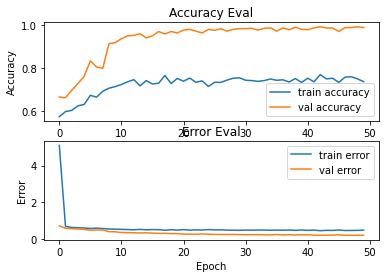

In [82]:
# Plot the training history of model

plot_history(history)

In [87]:
model.predict(inputs_predict, verbose=1, batch_size=1)

14/14 [==============================] - 0s 1ms/step


array([[5.4593664e-01, 4.5406333e-01],
       [1.3854999e-08, 1.0000000e+00],
       [6.5069383e-01, 3.4930623e-01],
       [6.5069383e-01, 3.4930623e-01],
       [9.8158090e-08, 9.9999988e-01],
       [6.5069383e-01, 3.4930623e-01],
       [5.1251678e-03, 9.9487478e-01],
       [6.5069383e-01, 3.4930623e-01],
       [6.5069383e-01, 3.4930623e-01],
       [1.0919417e-07, 9.9999988e-01],
       [5.1086851e-10, 1.0000000e+00],
       [3.0983864e-09, 1.0000000e+00],
       [9.2794508e-05, 9.9990726e-01],
       [7.4680393e-06, 9.9999249e-01]], dtype=float32)